<a href="https://colab.research.google.com/github/alex31425/BDA798/blob/main/BDA600_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


In [34]:
#import imageio
from mlxtend.image import extract_face_landmarks
import pandas as pd
#import matplotlib.image as mpimg
from IPython.core.display import display, HTML
from matplotlib import pyplot as plt
#from PIL import Image
import imutils
import cv2
from urllib.request import urlopen
import re


def read_img(url):
  plt.figure(figsize=(10, 10))
  resp = urlopen(url)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  #img = cv2.imread(file)
  img = imutils.resize(img, width=250)
  #img = mpimg.imread(file)
  imgplot = plt.imshow(img)
  print(img.shape)
  plt.show()

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

def print_landmarks(file):
  #img = cv2.imread(file)
  resp = urlopen(file)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = imutils.resize(img, width=250)
  #img = mpimg.imread(file)
  landmarks = extract_face_landmarks(img)
  #print(landmarks.shape)
  
  #print('\n\nlandmarks:\n')
  print('face boundary coordinate')
  face = []
  nose = []
  left_eye = []
  right_eye = []
  lips = []
  for i in range(0, 27):
    face.append(landmarks[i])
    #print(i,landmarks[i])
  #print('\nnose coordinate')
  for i in range(27, 36):
    nose.append(landmarks[i])
    #print(i,landmarks[i])
  #print('\nleft eye coordinate')
  for i in range(36, 42):
    left_eye.append(landmarks[i])
    #print(i,landmarks[i])
  #print('\nright eye coordinate')
  for i in range(42, 48):
    right_eye.append(landmarks[i])
    #print(i,landmarks[i])
  #print('\nlips coordiante')
  for i in range(48, 68):
    lips.append(landmarks[i])
    #print(i,landmarks[i])
  df_face = pd.DataFrame() 
  df_nose = pd.DataFrame()
  df_left_eye = pd.DataFrame()
  df_right_eye = pd.DataFrame()
  df_lips = pd.DataFrame()

  df_face['face'] = face
  df_face.index = np.arange(0, 27)

  df_nose['nose'] = nose
  df_nose.index = np.arange(27, 36)

  df_right_eye['right_eye'] = right_eye
  df_right_eye.index = np.arange(36, 42)

  df_left_eye['left_eye'] = left_eye
  df_left_eye.index = np.arange(42, 48)

  df_lips['lips'] = lips
  df_lips.index = np.arange(48, 68)

  display_side_by_side([df_face, df_nose, df_right_eye, df_left_eye, df_lips], ['face', 'nose', 'right eys', 'left eys', 'lips'])

def show_landmarks(file):
  resp = urlopen(file)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  #img = cv2.imread(file)
  img = imutils.resize(img, width=250)
  landmarks = extract_face_landmarks(img)
  fig = plt.figure(figsize=(15, 5))
  ax = fig.add_subplot(1, 3, 1)
  ax.imshow(img)
  ax = fig.add_subplot(1, 3, 2)
  ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
  ax = fig.add_subplot(1, 3, 3)
  img2 = img.copy()

  for p in landmarks:
      img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
      # note that the values -3 and +3 will make the landmarks
      # overlayed on the image 6 pixels wide; depending on the
      # resolution of the face image, you may want to change
      # this value

  ax.imshow(img2)
  plt.show()

def show_landmarks_withindex(file):
  resp = urlopen(file)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  #img = cv2.imread(file)
  img = imutils.resize(img, width=250)
  landmarks = extract_face_landmarks(img)
  left_eye = np.array([36, 37, 38, 39, 40, 41])
  right_eye = np.array([42, 43, 44, 45, 46, 47])

  fig = plt.figure(figsize=(10,10))
  plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
  for i in range(landmarks.shape[0]):
      plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)
      # plt.text(landmarks[i,0], -landmarks[i,1]-5, 
      #          str(img[:, :, (0)][landmarks[i][1]][landmarks[i][0]]), size=10, c = 'red')

  left_eye_center = np.mean(landmarks[left_eye], axis=0)
  right_eye_center = np.mean(landmarks[right_eye], axis=0)
  print('Coordinates of the Left Eye: ', left_eye_center)
  print('Coordinates of the Right Eye: ', right_eye_center)
  dist = np.linalg.norm(left_eye_center - right_eye_center)
  print('Distance of two eyes is', dist)
  plt.plot([left_eye_center[0]], [-left_eye_center[1]], 
              marker='+', color='blue', markersize=10, mew=4)

  plt.plot([right_eye_center[0]], [-right_eye_center[1]], 
              marker='+', color='blue', markersize=10, mew=4)
  plt.annotate("Black number :Landmarks", xy=(88, -140), c = 'black' , size=14)
  #plt.annotate("Red number :Pixel", xy=(88, -135), c = 'red', size=14)
  
  #plt.xticks([])
  #plt.yticks([])
  plt.grid()
  plt.show()

def show_landmarks_withindex_pixel(file):
  resp = urlopen(file)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  #img = cv2.imread(file)
  img = imutils.resize(img, width=250)
  landmarks = extract_face_landmarks(img)
  left_eye = np.array([36, 37, 38, 39, 40, 41])
  right_eye = np.array([42, 43, 44, 45, 46, 47])

  fig = plt.figure(figsize=(10,10))
  plt.plot(landmarks[:,0], -landmarks[:,1], 'ro', markersize=8, alpha = 0.5)
  for i in range(landmarks.shape[0]):
      plt.text(landmarks[i,0]+1, -landmarks[i,1], str(i), size=14)
      plt.text(landmarks[i,0], -landmarks[i,1]-5, 
               str(img[:, :, (0)][landmarks[i][1]][landmarks[i][0]]), size=10, c = 'red')

  left_eye_center = np.mean(landmarks[left_eye], axis=0)
  right_eye_center = np.mean(landmarks[right_eye], axis=0)
  print('Coordinates of the Left Eye: ', left_eye_center)
  print('Coordinates of the Right Eye: ', right_eye_center)
  dist = np.linalg.norm(left_eye_center - right_eye_center)
  print('Distance of two eyes is', dist)
  plt.plot([left_eye_center[0]], [-left_eye_center[1]], 
              marker='+', color='blue', markersize=10, mew=4)

  plt.plot([right_eye_center[0]], [-right_eye_center[1]], 
              marker='+', color='blue', markersize=10, mew=4)
  plt.annotate("Black number :Landmarks", xy=(88, -140), c = 'black' , size=14)
  plt.annotate("Red number :Pixel", xy=(88, -135), c = 'red', size=14)
  
  #plt.xticks([])
  #plt.yticks([])
  plt.grid()
  plt.show()

def bw_img(file):
  resp = urlopen(file)
  img = np.asarray(bytearray(resp.read()), dtype="uint8")
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  #img = cv2.imread(file)
  grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
  plt.imshow(blackAndWhiteImage)


def plot_landmarks(df_list,c_array):
  x_list = []
  y_list = []
  for i,c,p in df_list:
    coor = (re.split(r'[(),]',c))
    x = int(coor[1])
    y = int(coor[2])
    x_list.append(x)
    y_list.append(y)
    #print(i,x,y,p, sep = ',')
    c_array[y][x] = p
    c_array[min(y_list):max(y_list),min(x_list):max(x_list)]
  plt.figure(figsize=(10,10))  
  plt.imshow(c_array[min(y_list):max(y_list),min(x_list):max(x_list)], cmap='copper')
  #plt.colorbar()
  return plt.show()

(140, 250, 3)


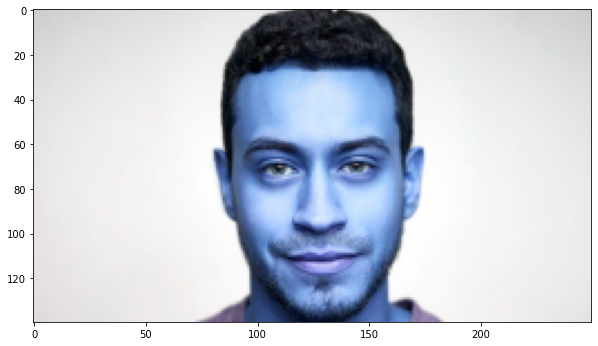

In [11]:
file = 'https://raw.githubusercontent.com/alex31425/BDA798/main/face.jpg'
img = read_img(file)

In [16]:

img = imutils.url_to_image(file)
img = imutils.resize(img, width=250)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image_array = np.array(img)

for d in range(img.shape[2]):
  print('Channel :',d)
  print(img[:, :, d].shape,img[:, :, d], sep='\n')
  print()

Channel : 0
(140, 250)
[[206 206 207 ... 200 199 198]
 [207 207 208 ... 203 202 201]
 [208 208 209 ... 205 204 204]
 ...
 [224 224 224 ... 229 229 228]
 [223 223 224 ... 229 228 228]
 [223 223 224 ... 228 228 228]]

Channel : 1
(140, 250)
[[204 204 205 ... 205 204 203]
 [205 205 206 ... 205 204 203]
 [206 206 207 ... 206 205 204]
 ...
 [220 220 220 ... 227 227 226]
 [219 219 220 ... 227 226 226]
 [219 219 220 ... 226 226 226]]

Channel : 2
(140, 250)
[[203 203 204 ... 204 203 202]
 [204 204 205 ... 205 204 203]
 [205 205 206 ... 206 205 204]
 ...
 [219 219 219 ... 227 227 226]
 [218 218 219 ... 227 226 226]
 [218 218 219 ... 226 226 226]]



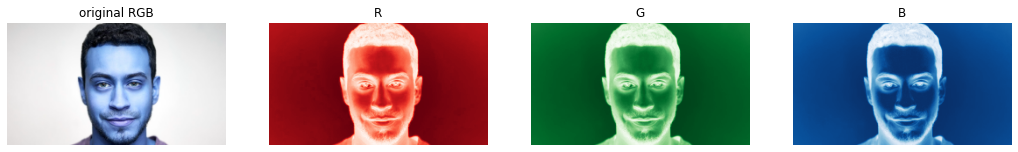

In [18]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(img[:,:,i], cmap=cmap)
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])

In [19]:
import itertools
import csv
landmarks = extract_face_landmarks(img)

# List for sequence generation
Inputlist = range(68)
  
# Calling the function Cycle from
# itertools and passing list as 
# an argument and the function 
# returns the iterator object
ListBuffer = itertools.cycle(Inputlist)
SequenceRepeation = 0
SequenceStart = 0
SequenceEnd = len(Inputlist)


with open(f'landmard.csv', 'w') as f:
  writer = csv.writer(f)
  for output in ListBuffer:
      if(SequenceStart == 0):
          print(f'Channel :{SequenceRepeation + 1}')
          print(f'{"Index":5} {"Landmarks"} {"Pixel"}')
      # Cycle function iterates through 
      # each element and produces the 
      # sequence and repeats it the 
      
      print(f'{output:3} {landmarks[output][0]:5},{landmarks[output][1]}   '
            f'{img[:, :, (SequenceRepeation)][landmarks[output][1]][landmarks[output][0]]}')
    
      landmark_list = [output,(landmarks[output][0],landmarks[output][1]),img[:, :, (SequenceRepeation)][landmarks[output][1]][landmarks[output][0]]]
      writer.writerow(landmark_list)

      if(SequenceStart == SequenceEnd-1):
            
          if(SequenceRepeation>= 2):
              break
          else:
              SequenceRepeation+= 1
              SequenceStart = 0
              print("\n")
      else:
          SequenceStart+= 1

Channel :1
Index Landmarks Pixel
  0    87,70   22
  1    88,81   77
  2    90,93   45
  3    93,104   62
  4    97,114   51
  5   104,123   18
  6   112,131   15
  7   120,138   3
  8   131,139   3
  9   142,136   13
 10   150,129   28
 11   156,120   37
 12   162,111   159
 13   165,100   135
 14   166,89   86
 15   167,78   147
 16   167,67   114
 17    94,65   61
 18    99,59   49
 19   106,57   126
 20   114,59   126
 21   121,62   102
 22   133,61   118
 23   140,58   161
 24   147,57   161
 25   155,57   127
 26   160,62   106
 27   127,70   194
 28   128,78   211
 29   128,86   218
 30   128,95   191
 31   120,98   27
 32   124,99   17
 33   129,101   67
 34   133,99   82
 35   137,97   57
 36   103,72   40
 37   107,69   17
 38   113,69   27
 39   117,72   113
 40   112,74   161
 41   107,74   129
 42   138,72   119
 43   142,69   17
 44   147,68   24
 45   152,70   17
 46   148,73   120
 47   143,73   140
 48   111,110   26
 49   118,110   51
 50   124,109   78
 51   129,109 

In [24]:
print_landmarks(file)

face boundary coordinate


,face
0,[87 70]
1,[88 81]
2,[90 93]
3,[ 93 104]
4,[ 97 114]
5,[104 123]
6,[112 131]
7,[120 138]
8,[131 139]
9,[142 136]


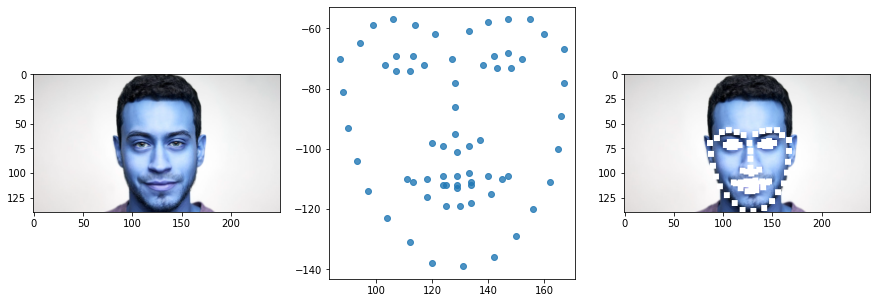

In [27]:
show_landmarks(file)

Coordinates of the Left Eye:  [109.83333333  71.66666667]
Coordinates of the Right Eye:  [145.          70.83333333]
Distance of two eyes is 35.17653889865928


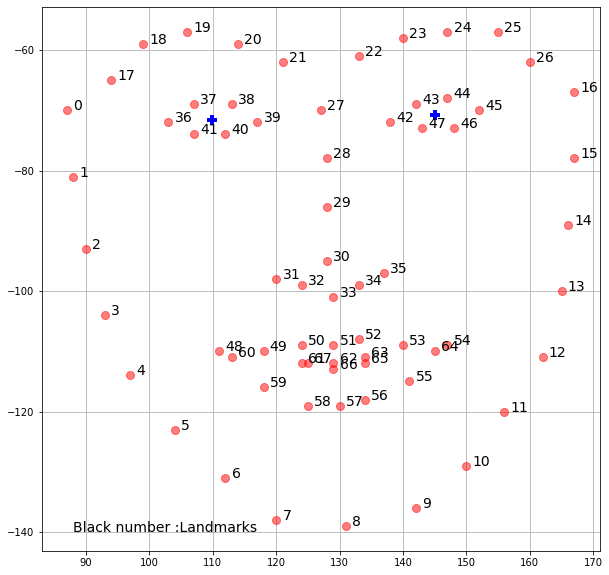

In [29]:
show_landmarks_withindex(file)

Coordinates of the Left Eye:  [109.83333333  71.66666667]
Coordinates of the Right Eye:  [145.          70.83333333]
Distance of two eyes is 35.17653889865928


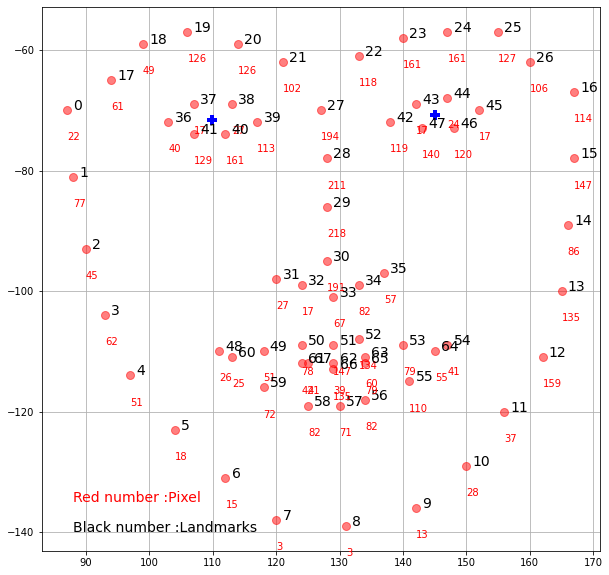

In [32]:
show_landmarks_withindex_pixel(file)

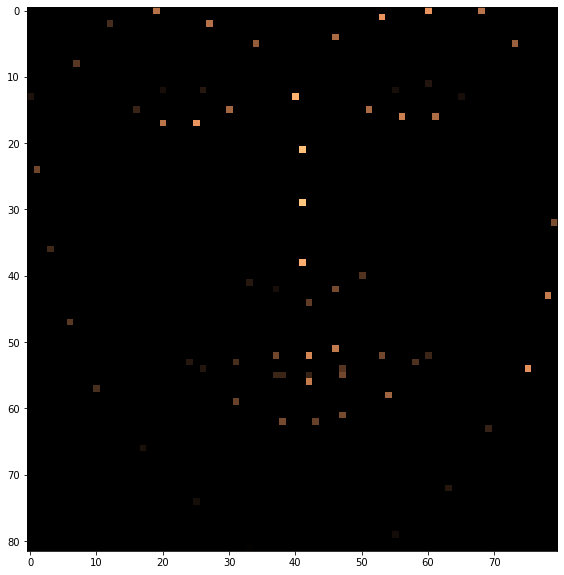

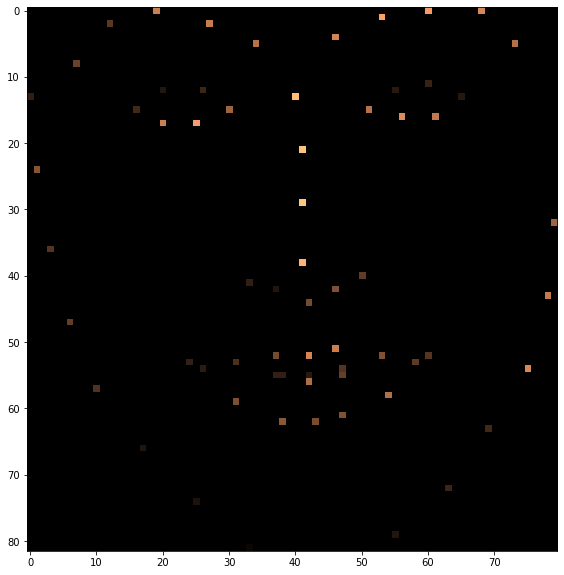

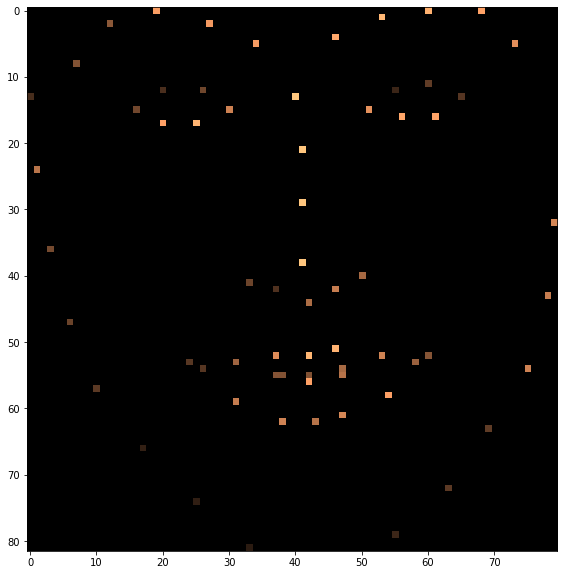

In [35]:
c1_array = np.zeros((img.shape[0], img.shape[1]))
c2_array = np.zeros((img.shape[0], img.shape[1]))
c3_array = np.zeros((img.shape[0], img.shape[1]))

df = pd.read_csv('https://raw.githubusercontent.com/alex31425/BDA798/main/landmark.csv', names = ['Index','Landmark', 'Pixel'], header = None)
df_list = df.values.tolist()
c1_list = df_list[:68]
c2_list = df_list[68:67+69]
c3_list = df_list[67+69:67+69+69]

plot_landmarks(c1_list,c1_array)
plot_landmarks(c2_list,c2_array)
plot_landmarks(c3_list,c3_array)